In [1]:
from registration_framework import Registration
from pso_optim import PSO_optim
from config import Config

config = Config()
registration = Registration(config)
pso = PSO_optim(config)
registration.set_optim_algorithm(pso)
result = registration.registrate()


r_width: 300, r_height: 300
iterations: 0, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 1, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 2, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 3, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 4, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 5, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 6, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 7, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 8, fitness: 0.38280520303785737, params: tensor([ 8.3100e+02,  8.1347e+02, -5.5866e-01])
iterations: 9, fitness: 0.3843164356645768, params: tensor([ 8.

spatial information: 0.10453333333333334


(<Axes: title={'center': 'reg_img'}>,
 Text(0.5, 1.0, 'reg_img'))

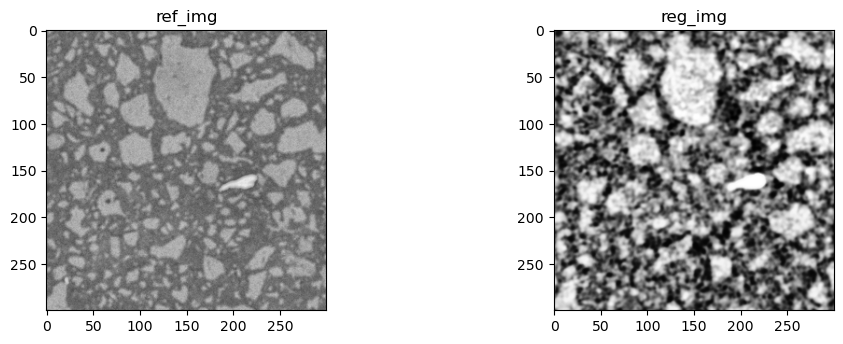

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


ref_img = registration.refered_img
reg_img = result[1]


sp = registration.spatial_correlation(ref_img, reg_img)
print(f"spatial information: {sp}")

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(ref_img, cmap='gray', vmin=0, vmax=255), plt.title('ref_img')
plt.subplot(2, 2, 2), plt.imshow(reg_img, cmap='gray', vmin=0, vmax=255), plt.title('reg_img')


